# DATA EXPLORATION AND PREPROCESSING (Part B)

## Question 1: Outliers removal and transformation


In [106]:
# importing packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import seaborn as sns


In [107]:
# 1 - reading csv file and printing first 5 rows
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [108]:
# (a) finding the kurtosis and skewness values of the Insulin attribute? 
kurtosis = df["Insulin"].kurtosis()
skewness = df['Insulin'].skew()

print("The kurtosis for Insulin is", kurtosis)
print("The skewness for Insulin is", skewness)

The kurtosis for Insulin is 7.265911343503076
The skewness for Insulin is 2.268393486537506


In [109]:
# (b) filtering the dataframe and selecting only the rows where Insulin is not equal to 0 
df = df.loc[df["Insulin"] != 0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,205,33.2,0.591,25,0
781,1,140,74.0,26,180,24.1,0.828,23,0
782,1,144,82.0,46,180,46.1,0.335,46,1
785,2,121,70.0,32,95,39.1,0.886,23,0


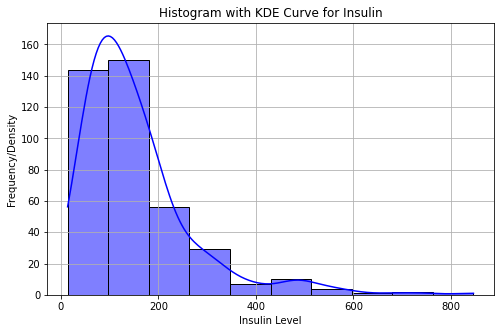

In [110]:
# drawing histogram of Insulin column along with kernel density estimation (KDE) curb
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['Insulin'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('Insulin Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for Insulin')

plt.grid(True)
plt.show()

In [111]:
# identifying outliers of Insulin using Inter Quartile Range (IQR), approaching and imputing them with min and max values appropriately.
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Q2:", q3)
print("Interquartile Range:", iqr)

Q1: 77.0
Q2: 190.0
Interquartile Range: 113.0


In [112]:
outliers = df.loc[(df['Insulin'] < q1) | (df['Insulin'] > q3)]
print("Dataframe of outliers:")
outliers

Dataframe of outliers:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
16,0,118,84.0,47,230,45.8,0.551,12,1
20,3,126,88.0,41,235,39.3,0.704,27,0
31,3,158,76.0,36,245,31.6,0.851,28,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78.0,39,74,39.0,0.261,28,0
753,0,181,88.0,44,510,43.3,0.222,26,1
760,2,88,58.0,26,16,28.4,0.766,22,0
771,1,121,78.0,39,74,39.0,0.261,28,0


In [113]:
min = df["Insulin"].min()
max = df["Insulin"].max()

print("Min:", min, "\nMax:", max)

Min: 14 
Max: 846


In [114]:
df.loc[df["Insulin"] < q1, "Insulin"] = min
df.loc[df["Insulin"] > q3, "Insulin"] = max
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,846,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
778,2,129,74.0,26,846,33.2,0.591,25,0
781,1,140,74.0,26,180,24.1,0.828,23,0
782,1,144,82.0,46,180,46.1,0.335,46,1
785,2,121,70.0,32,95,39.1,0.886,23,0


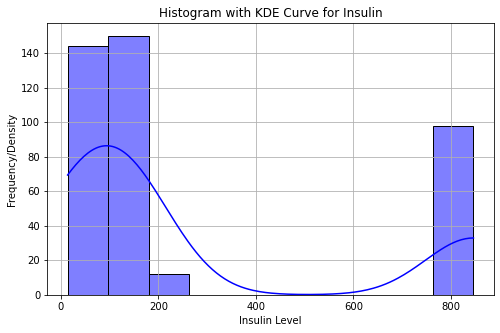

In [116]:
plt.figure(figsize=(8, 5))  # Set the figure size

# Plot the histogram with KDE curve
sns.histplot(df['Insulin'], bins=10, color='blue', kde=True)

# Add labels and a title
plt.xlabel('Insulin Level')
plt.ylabel('Frequency/Density')
plt.title('Histogram with KDE Curve for Insulin')

plt.grid(True)
plt.show()